In [1]:
import pandas as pd
!pip install yfinance
import yfinance as yf
import datetime 
import matplotlib.pyplot as plt
import numpy as np

C:\Users\aacas\anaconda3\lib\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
Investment = 10000
start_date = datetime.date(1997,1,1)
end_date = datetime.datetime.today()

In [3]:
amzn_df = yf.download('AMZN', start= start_date, end= end_date)
aapl_df = yf.download('AAPL', start= start_date, end= end_date)


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [4]:
#Cleaning the dataset
amzn = pd.DataFrame(amzn_df)
amzn.reset_index(inplace=True)
aapl = pd.DataFrame(aapl_df)
aapl.reset_index(inplace=True)
amzn.drop(['High','Low','Adj Close', 'Volume'],axis=1,inplace=True)
aapl.drop(['High','Low','Adj Close', 'Volume'],axis=1,inplace=True)

In [5]:
amzn.head()

,Date,Open,Close
0,1997-05-15,0.121875,0.097917
1,1997-05-16,0.098438,0.086458
2,1997-05-19,0.088021,0.085417
3,1997-05-20,0.086458,0.081771
4,1997-05-21,0.081771,0.071354


In [6]:
aapl.head()

,Date,Open,Close
0,1997-01-02,0.188616,0.187500
1,1997-01-03,0.188616,0.194196
2,1997-01-06,0.157366,0.159598
3,1997-01-07,0.161830,0.156250
4,1997-01-08,0.162946,0.157366


In [7]:
# Calculating overnight return % by using ((Open-Prev.CLose)/Close)*100 for AMZN
amzn['onr%'] = ((amzn['Open'].shift(-1) - amzn['Close']).shift(1)/amzn['Close'])*100
amzn['onr%'] = amzn['onr%'].fillna(0)


# Calculating overnight return % by using ((Open-Prev.CLose)/Close)*100 for AAPL
aapl['onr%'] = ((aapl['Open'].shift(-1) - aapl['Close']).shift(1)/aapl['Close'])*100 
aapl['onr%'] = aapl['onr%'].fillna(0)


In [8]:
# Calculating day return % for AMZN
amzn['dayr%']= ((amzn['Close']-amzn['Open'])/amzn['Close'])*100
amzn['dayr%'] = amzn['dayr%'].fillna(0)

# Calculating day return % for AAPL
aapl['dayr%']= ((aapl['Close']-aapl['Open'])/aapl['Close'])*100
aapl['dayr%'] = aapl['dayr%'].fillna(0)


In [9]:
#Calculating PnL for overnight and day returns AMZN
print(str(Investment)+'$ invested in Amazon Stock on',start_date) 

amzn_profit_onr = 0
amzn['profit_onr']=0

amzn_profit_dayr = 0
amzn['profit_dayr']=0

for i in range(1,amzn['Date'].count()):
    
    amzn_pnlonr =  (amzn['onr%'][i]/100)*Investment
    amzn_pnldayr=(amzn['dayr%'][i]/100)*Investment
    
    print('Overnight PnL on',amzn['Date'][i],'is $',amzn_pnlonr)
    
    amzn_profit_onr = amzn_profit_onr + amzn_pnlonr
    amzn_profit_dayr = amzn_profit_dayr + amzn_pnldayr
    amzn['profit_onr'][i]=amzn_profit_onr
    amzn['profit_dayr'][i]=amzn_profit_dayr
    
print('Current Overnight Investment Value: ',(Investment+amzn_profit_onr))
print('Total Overnight PnL % :',((amzn_profit_onr/Investment)*100).round(3))

print('Current Day Investment Value: ',(Investment+amzn_profit_dayr))
print('Total Day PnL % :',((amzn_profit_dayr/Investment)*100).round(3))


C:\Users\aacas\AppData\Local\Temp\ipykernel_12424\2467175088.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn['profit_onr'][i]=amzn_profit_onr
C:\Users\aacas\AppData\Local\Temp\ipykernel_12424\2467175088.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amzn['profit_dayr'][i]=amzn_profit_dayr


10000$ invested in Amazon Stock on 1997-01-01
Overnight PnL on 1997-05-16 00:00:00 is $ 60.26096077660185
Overnight PnL on 1997-05-19 00:00:00 is $ 182.98524939124997
Overnight PnL on 1997-05-20 00:00:00 is $ 127.30614832569454
Overnight PnL on 1997-05-21 00:00:00 is $ 0.0
Overnight PnL on 1997-05-22 00:00:00 is $ 74.64992136494905
Overnight PnL on 1997-05-23 00:00:00 is $ 69.46623049313902
Overnight PnL on 1997-05-27 00:00:00 is $ 65.80983783056321
Overnight PnL on 1997-05-28 00:00:00 is $ 272.0630137156933
Overnight PnL on 1997-05-29 00:00:00 is $ 69.09359319353908
Overnight PnL on 1997-05-30 00:00:00 is $ -34.66606002386173
Overnight PnL on 1997-06-02 00:00:00 is $ 68.98700378255998
Overnight PnL on 1997-06-03 00:00:00 is $ 140.89090034478502
Overnight PnL on 1997-06-04 00:00:00 is $ 0.0
Overnight PnL on 1997-06-05 00:00:00 is $ 0.0
Overnight PnL on 1997-06-06 00:00:00 is $ -157.2212546085357
Overnight PnL on 1997-06-09 00:00:00 is $ 0.0
Overnight PnL on 1997-06-10 00:00:00 is $ 131

In [10]:
#Calculating PnL for overnight and day returns AAPL
print(str(Investment)+'$ invested in Apple Stock on',start_date) 

aapl_profit_onr = 0
aapl['profit_onr']=0

aapl_profit_dayr = 0
aapl['profit_dayr']=0

for i in range(1,aapl['Date'].count()):
    
    aapl_pnlonr =  (aapl['onr%'][i]/100)*Investment
    aapl_pnldayr=(aapl['dayr%'][i]/100)*Investment
    
    print('Overnight PnL on',aapl['Date'][i],'is $',aapl_pnlonr)
    
    aapl_profit_onr = aapl_profit_onr + aapl_pnlonr
    aapl_profit_dayr = aapl_profit_dayr + aapl_pnldayr
    aapl['profit_onr'][i]=aapl_profit_onr
    aapl['profit_dayr'][i]=aapl_profit_dayr
    
print('Current Overnight Investment Value: ',(Investment+aapl_profit_onr))
print('Total Overnight PnL % :',((aapl_profit_onr/Investment)*100).round(3))

print('Current Day Investment Value: ',(Investment+aapl_profit_dayr))
print('Total Day PnL % :',((aapl_profit_dayr/Investment)*100).round(3))

10000$ invested in Apple Stock on 1997-01-01
Overnight PnL on 1997-01-03 00:00:00 is $ 57.46733513025701
Overnight PnL on 1997-01-06 00:00:00 is $ -2307.6736343231464
Overnight PnL on 1997-01-07 00:00:00 is $ 142.84801483154297
Overnight PnL on 1997-01-08 00:00:00 is $ 425.5049379995726
Overnight PnL on 1997-01-09 00:00:00 is $ 70.41856897440255
Overnight PnL on 1997-01-10 00:00:00 is $ -68.48941131972842
Overnight PnL on 1997-01-13 00:00:00 is $ 137.98422445497687
Overnight PnL on 1997-01-14 00:00:00 is $ 139.9148867833628
Overnight PnL on 1997-01-15 00:00:00 is $ 72.45955460603467
Overnight PnL on 1997-01-16 00:00:00 is $ -74.62138561848727
Overnight PnL on 1997-01-17 00:00:00 is $ 0.0
Overnight PnL on 1997-01-20 00:00:00 is $ 73.79636031629151
Overnight PnL on 1997-01-21 00:00:00 is $ 36.229777303017336
Overnight PnL on 1997-01-22 00:00:00 is $ 72.72302851883852
Overnight PnL on 1997-01-23 00:00:00 is $ 36.229777303017336
Overnight PnL on 1997-01-24 00:00:00 is $ 0.0
Overnight PnL o

C:\Users\aacas\AppData\Local\Temp\ipykernel_12424\1851424929.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['profit_onr'][i]=aapl_profit_onr
C:\Users\aacas\AppData\Local\Temp\ipykernel_12424\1851424929.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['profit_dayr'][i]=aapl_profit_dayr


Overnight PnL on 2007-10-05 00:00:00 is $ 131.9291150495682
Overnight PnL on 2007-10-08 00:00:00 is $ 121.49563476072052
Overnight PnL on 2007-10-09 00:00:00 is $ 136.42156255284382
Overnight PnL on 2007-10-10 00:00:00 is $ -18.58506921791576
Overnight PnL on 2007-10-11 00:00:00 is $ 166.4292327634097
Overnight PnL on 2007-10-12 00:00:00 is $ 46.636243210323386
Overnight PnL on 2007-10-15 00:00:00 is $ 43.718813754271274
Overnight PnL on 2007-10-16 00:00:00 is $ -84.91446355052243
Overnight PnL on 2007-10-17 00:00:00 is $ 180.02842484924466
Overnight PnL on 2007-10-18 00:00:00 is $ -72.04621706763439
Overnight PnL on 2007-10-19 00:00:00 is $ 43.42155661235081
Overnight PnL on 2007-10-22 00:00:00 is $ -4.014774185224053
Overnight PnL on 2007-10-23 00:00:00 is $ 762.784994747209
Overnight PnL on 2007-10-24 00:00:00 is $ -18.824001830266877
Overnight PnL on 2007-10-25 00:00:00 is $ -57.993085125188564
Overnight PnL on 2007-10-26 00:00:00 is $ 135.89626039688255
Overnight PnL on 2007-10-29

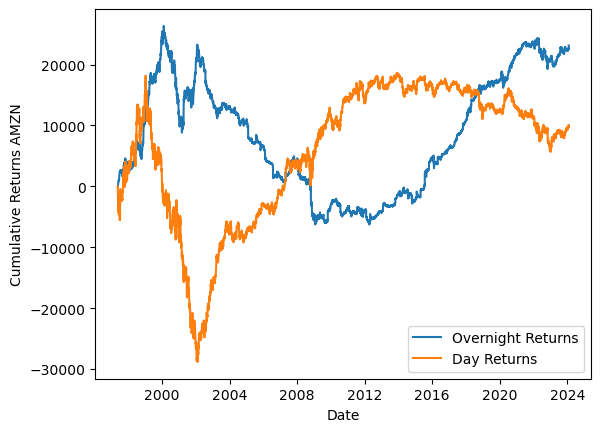

In [11]:
    #Plotting both day and night cumulative returns AMZN
    plt.plot(amzn['Date'],amzn['profit_onr'],label='Overnight Returns')
    plt.plot(amzn['Date'],amzn['profit_dayr'],label='Day Returns')
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns AMZN")
    plt.legend(['Overnight Returns','Day Returns'], loc='lower right')
    plt.show()

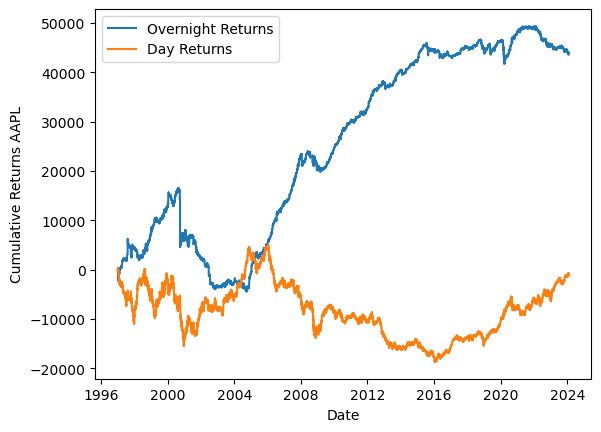

In [12]:
    #Plotting both day and night cumulative returns AAPL
    plt.plot(aapl['Date'],aapl['profit_onr'],label='Overnight Returns')
    plt.plot(aapl['Date'],aapl['profit_dayr'],label='Day Returns')
    plt.xlabel("Date")
    plt.ylabel("Cumulative Returns AAPL")
    plt.legend(['Overnight Returns','Day Returns'], loc='upper left')
    plt.show()

In [13]:
#Annualized Sharpe Ratio AMZN
#Assumption: risk free return rate=0
returns_onr = amzn['onr%']
returns_dayr= amzn['dayr%']
volatility_onr = returns_onr.std() * np.sqrt(252) 
sharpe_ratio_onr = ((returns_onr.mean()*252)) / volatility_onr
volatility_dayr = returns_dayr.std() * np.sqrt(252) 
sharpe_ratio_dayr = ((returns_dayr.mean()*252)) / volatility_dayr
print("Sharpe Ratio for Overnight Returns for AMZN stock: "+str(sharpe_ratio_onr))
print("Sharpe Ratio for Day Returns for AMZN stock: "+str(sharpe_ratio_dayr))

Sharpe Ratio for Overnight Returns for AMZN stock: 0.2745957422456351
Sharpe Ratio for Day Returns for AMZN stock: 0.05987598697802271


In [14]:
#Annualized Sharpe Ratio AAPL
#Assumption: risk free return rate=0
returns_onr = aapl['onr%']
returns_dayr= aapl['dayr%']
volatility_onr = returns_onr.std() * np.sqrt(252) 
sharpe_ratio_onr = ((returns_onr.mean()*252)) / volatility_onr
volatility_dayr = returns_dayr.std() * np.sqrt(252) 
sharpe_ratio_dayr = ((returns_dayr.mean()*252)) / volatility_dayr
print("Sharpe Ratio for Overnight Returns for AAPL stock: "+str(sharpe_ratio_onr))
print("Sharpe Ratio for Day Returns for AAPL stock: "+str(sharpe_ratio_dayr))

Sharpe Ratio for Overnight Returns for AAPL stock: 0.5323909775262667
Sharpe Ratio for Day Returns for AAPL stock: -0.008609264098275192
